<a href="https://colab.research.google.com/github/marlonfs/intro-to-deep-learning/blob/main/TensorFlow_tch_cana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importar as bibliotecas

In [ ]:
# Importar bibliotecas

# TensorFlow e Layers
import tensorflow as tf
from tensorflow.keras import layers

# Importar a bilbioteca Keras
from tensorflow import keras

# Importar Pandas
import pandas as pd

# Importar Numpy
import numpy as np

# Conjunto Treino/Teste
from sklearn.model_selection import train_test_split

# Normalizar os dados
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Transformar a colunas em códigos de 0 a n_classes-1
from sklearn.preprocessing import LabelEncoder

# Importar MatplotLip
import matplotlib.pyplot as plt

##Só rodar se for usar TPU

In [ ]:
print("Tensorflow version " + tf.__version__)

Tensorflow version 2.3.0


In [ ]:
# TF 2.3 version
# Detect and init the TPU
try: # detect TPUs
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect() # TPU detection
    strategy = tf.distribute.TPUStrategy(tpu)
except ValueError: # detect GPUs
    strategy = tf.distribute.get_strategy() # default strategy that works on CPU and single GPU
print("Number of accelerators: ", strategy.num_replicas_in_sync)


INFO:tensorflow:Initializing the TPU system: grpc://10.52.188.250:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.52.188.250:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Number of accelerators:  8


##Montar o drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#definir o working directory
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Dados_topico5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Carregar dados cana (AP522) e preprocessamento dos dados

In [ ]:
#importar o arquivo e criar o df
df = pd.read_csv('fa084_tch_mult.csv')
# Excluir 'espac'
df.drop('espac',axis=1,inplace=True)
# Excluir os registros com estágio de corte 7
df = df[df.estagio!=7]
# Considerar somente as três variedades mais frequentes e excluir as demais
variedade_freq=df.variedade.value_counts().head(3)
df = df.loc[df.variedade.isin(variedade_freq.index)]
#encode atributos categoricos
df = pd.get_dummies(df)
# Separar atributos preditores(X) do atributo meta (y)
y = df.tch
X = df.drop('tch', axis=1)
# Criar X_train, X_test, y_train, y_test com as proporções 70/30 e random_state = 2020
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 2020)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5995, 16) (2570, 16) (5995,) (2570,)


In [ ]:
# Normalizar os conjuntos de treino e teste [0-1]

def_scaler = MinMaxScaler().fit(X_train)
X_train_norm = pd.DataFrame(def_scaler.transform(X_train))

X_train_norm.rename(columns=dict(zip(
    X_train_norm.columns.tolist(), X.columns.tolist())), inplace=True)

X_test_norm = pd.DataFrame(def_scaler.transform(X_test))

X_test_norm.rename(columns=dict(zip(
    X_test_norm.columns.tolist(), X.columns.tolist())), inplace=True)

##Rede Neural Sklearn (ANN)

In [ ]:
# Importar pacote MLPRegressor (Multi Layer Perceptron)
from sklearn.neural_network import MLPRegressor
#Randomized Search
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
%%time
n_layers_min=1
n_layers_max=5
neurons_min=50
neurons_max=250

def faixa(start, stop, step):
  y=[]
  for i in np.arange(n_layers_max):
    x=[tuple(np.full(shape = i+1, fill_value= n)) for n in range(start, stop, step)]
    y+=x
  return y

ANN=MLPRegressor(random_state=2020)
param_range = [{'hidden_layer_sizes':faixa(neurons_min,neurons_max,10)}]      
#Otimização de hiperparametros
ANNRndSearch = RandomizedSearchCV(ANN,
                                 param_distributions=param_range,
                                 n_iter=10,
                                 n_jobs=-1,
                                 random_state=2020)
ANNRndSearch.fit(X_train_norm, y_train)

CPU times: user 1min 14s, sys: 31.9 s, total: 1min 46s
Wall time: 16min 14s


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
#Importar as metricas
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
#predição do modelo ANN
y_pred = ANNRndSearch.predict(X_test_norm)

In [ ]:
# Após otimização e predição
MAE_MLP = mean_absolute_error(y_test, y_pred)
RMSE_MLP = np.sqrt(mean_squared_error(y_test, y_pred))

print('MAE = ', MAE_MLP)
print('RMSE = ', RMSE_MLP)

MAE =  9.79222728528094
RMSE =  13.127295549029657


##Resultados da Atividade 8 (AP522)
O X-treme Gradient Boosting (XGB) se apresentou como modelo com melhor ajuste, com os menores valores de RMSE e MAE tanto na otimização randomica quanto em grade para o conjunto de dados 'fa084_tch_mult.csv'.

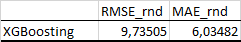

## Aplicação com TensorFlow

###Básico

In [ ]:
# Definir a quantidade de atributos a serem utilizados no modelo

input_shape = [X_train_norm.shape[1]]

In [ ]:
# Definir a estrutura da rede neural

model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=input_shape),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),    
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1),
])

In [ ]:
# Definir a função perda e otimizador

model.compile(
    optimizer='adam',
    loss='mae'
)

In [ ]:
# Treinar o modelo
history = model.fit(
    X_train_norm,y_train,
    validation_data=(X_test_norm, y_test),
    batch_size=i,
    epochs=600,
    )

Minimum Validation Loss: 11.4306
Minimum Loss: 11.3926


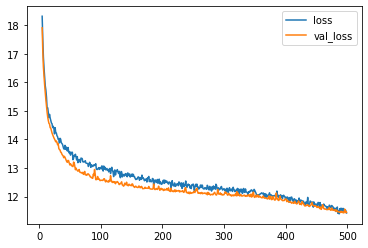

In [ ]:
history_df = pd.DataFrame(history.history)
# Iniciar a plotagem a partir da época 5
history_df.loc[5:, ['loss','val_loss']].plot();
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));
print("Minimum Loss: {:0.4f}".format(history_df['loss'].min()));

###Variando o batch size

In [ ]:
# Parada antecipada e ajuste learning rate

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, 
    patience=15, 
    restore_best_weights=True,
)

In [ ]:
histories = []
for i in range(10,600,50):
  history = model.fit(
      X_train_norm,y_train,
      validation_data=(X_test_norm, y_test),
      batch_size=i,
      epochs=600,
      callbacks=[early_stopping],
      )
  histories.append(pd.DataFrame(history.history))

Epoch 1/600
600/600 [==============================] - 2s 4ms/step - loss: 30.9184 - val_loss: 15.5619
Epoch 2/600
600/600 [==============================] - 2s 3ms/step - loss: 14.9400 - val_loss: 14.2282
Epoch 3/600
600/600 [==============================] - 2s 4ms/step - loss: 14.6194 - val_loss: 14.1829
Epoch 4/600
600/600 [==============================] - 2s 4ms/step - loss: 14.1625 - val_loss: 13.6089
Epoch 5/600
600/600 [==============================] - 2s 3ms/step - loss: 14.3316 - val_loss: 13.7269
Epoch 6/600
600/600 [==============================] - 2s 3ms/step - loss: 13.9993 - val_loss: 13.3700
Epoch 7/600
600/600 [==============================] - 2s 3ms/step - loss: 13.8652 - val_loss: 13.1819
Epoch 8/600
600/600 [==============================] - 2s 3ms/step - loss: 13.9562 - val_loss: 13.2254
Epoch 9/600
600/600 [==============================] - 2s 4ms/step - loss: 13.8332 - val_loss: 13.1599
Epoch 10/600
600/600 [==============================] - 2s 3ms/step - los

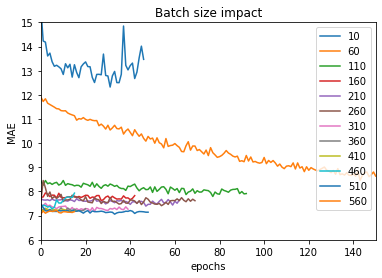

In [ ]:
#histories[0].loc[:,['val_loss']].plot()

fig = plt.figure()

for frame in histories:
    plt.plot(frame.index, frame['val_loss'])

plt.xlim(0,150)
plt.ylim(6,15)
plt.ylabel('MAE')
plt.xlabel('epochs')
plt.title('Batch size impact')
plt.legend(list(range(10,600,50)))
plt.show()

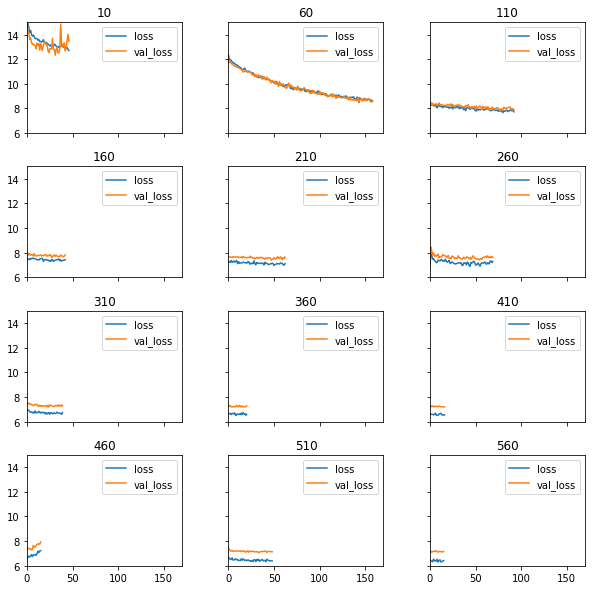

In [ ]:
fig, axes = plt.subplots(4,3, figsize=(10,10), sharex=True, sharey=True);
for key, ax in enumerate(axes.flatten()):
  for i in histories[key].columns:
    ax.plot(histories[key].loc[:,[i]], label=i)
  ax.set(title=list(range(10,600,50))[key],
       xlim=(0,170),
       ylim=(6,15),
       )
  ax.legend()
plt.subplots_adjust(hspace=0.3, wspace=0.3)

###Aplicação do TensorFlow com TPU

In [ ]:
# Definir a estrutura da rede neural

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=input_shape),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(), 
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(1),
])

# Definir a função perda e otimizador

model.compile(
    optimizer='adam',
    loss='mae'
)

In [ ]:
# Parada antecipada e ajuste learning rate

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

early_stopping = EarlyStopping(
    min_delta=0.001, 
    patience=15, 
    restore_best_weights=True,
)

lr_schedule = ReduceLROnPlateau(
    patience=10,
    factor=0.02,
    min_lr=0.001,
)

In [ ]:
# Training Configuration
BATCH_SIZE_PER_REPLICA = 2 ** 5 # powers of 128 are best


validation_size = X_test.shape[0]
training_size = X_train.shape[0]

# For model.fit
batch_size = BATCH_SIZE_PER_REPLICA * strategy.num_replicas_in_sync
steps_per_epoch = training_size // batch_size
validation_steps = validation_size // batch_size

In [ ]:
# Treinar o modelo

history = model.fit(
    X_train_norm,y_train,
    validation_data=(X_test_norm, y_test),
    epochs=600,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[early_stopping, lr_schedule],
)

Epoch 1/600
 1/23 [>.............................] - ETA: 0s - loss: 6.8084WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0018s vs `on_train_batch_end` time: 0.0168s). Check your callbacks.


22/23 [===========================>..] - ETA: 0s - loss: 6.0820WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0014s vs `on_test_batch_end` time: 0.0043s). Check your callbacks.


23/23 [==============================] - 1s 25ms/step - loss: 6.0855 - val_loss: 6.9937
Epoch 2/600
23/23 [==============================] - 0s 20ms/step - loss: 6.0155 - val_loss: 7.0119
Epoch 3/600
23/23 [==============================] - 1s 22ms/step - loss: 6.1129 - val_loss: 6.9538
Epoch 4/600
23/23 [==============================] - 0s 21ms/step - loss: 6.0921 - val_loss: 7.0779
Epoch 5/600
23/23 [==============================] - 0s 21ms/step - loss: 5.9551 - val_loss: 6.9582
Epoch 6/600
23/23 [==============================] - 0s 20ms/step - loss: 6.0444 - val_loss: 6.9826
Epoch 7/600
23/23 [==============================] - 0s 21ms/step - loss: 6.0694 - val_loss: 6.9993
Epoch 8/600
23/23 [==============================] - 0s 20ms/step - loss: 6.1170 - val_loss: 6.9962
Epoch 9/600
23/23 [==============================] - 0s 20ms/step - loss: 6.0367 - val_loss: 6.9962
Epoch 10/600
23/23 [==============================] - 1s 23ms/step - loss: 5.9725 - val_loss: 6.9490
Epoch 11/60

Minimum Validation Loss: 6.3458


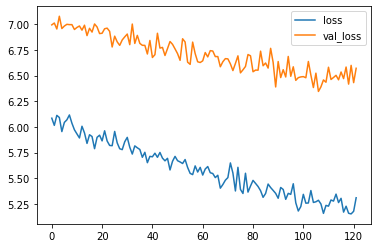

In [ ]:

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));